### Especificaciones de todos los coches en India

In [1]:
#Para manipular datos
import pandas as pd

In [2]:
#Carga del csv y lo asignamos a una variable
df = pd.read_csv("./all_cars_datset_final.csv")
df.head()
#Marca, Nombre, Precio, clasificacion, seguridad, kilometraje, potencia, ventas del año

,Brand,Car Name,Price,Rating,Safety,Mileage,Power (BHP),FY2024(sales)
0,Maruti Suzuki,Maruti Brezza,Rs. 8.69 Lakh,4.5/5,4 Star Safety,17-25 kmpl,87-102 bhp,"1,69,897"
1,Maruti Suzuki,Maruti Fronx,Rs. 7.54 Lakh,4.6/5,3 Star Safety,20-28 kmpl,76-99 bhp,"1,34,735"
2,Maruti Suzuki,Maruti Swift,Rs. 6.49 Lakh,4.6/5,2 Star Safety,24-32 kmpl,69-80 bhp,"1,95,321"
3,Maruti Suzuki,Maruti Dzire,Rs. 6.84 Lakh,4.7/5,5 Star Safety,24-33 kmpl,69-80 bhp,"1,64,517"
4,Maruti Suzuki,Maruti Baleno,Rs. 6.70 Lakh,4.5/5,4 Star Safety,22-30 kmpl,76-88 bhp,"1,95,607"


In [3]:
#Vemos el tamaño de nuestro dataset
df.shape

(248, 8)

#### Reasignamos el nombre de las columnas

In [4]:
columnasNuevas = {
    'Brand': 'Marca',
    'Car Name': 'Modelo',
    'Price': 'Precio',
    'Rating': 'Clasificacion',
    'Safety': 'Nivel de Seguridad',
    'Mileage': 'Km por Litro',
    'Power (BHP)': 'Caballos de Fuerza',
    'FY2024(sales)': 'Ventas'
}

In [5]:
df.rename( columns = columnasNuevas, inplace = True ) # inplace = true modifica el df directamente sin necesidad de reasignar
df.tail(20)

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
228,Isuzu,Isuzu V-Cross,Rs. 21.20 Lakh,4.8/5,4 Star Safety,NaN,161 bhp,NaN
229,Isuzu,Isuzu MU-X,Rs. 35.00 Lakh,4.6/5,4 Star Safety,NaN,161 bhp,NaN
230,Maserati,Maserati Ghibli,Rs. 1.20 Crore,4.7/5,5 Star Safety,8-16 kmpl,275-581 bhp,NaN
231,Maserati,Maserati MC20,Rs. 3.65 Crore,4.9/5,5 Star Safety,8 kmpl,621 bhp,NaN
232,Maserati,Maserati Levante,Rs. 1.45 Crore,4.5/5,5 Star Safety,9-10 kmpl,271-430 bhp,NaN
233,Maserati,Maserati Quattroporte,Rs. 1.80 Crore,4.4/5,5 Star Safety,8-14 kmpl,275-572 bhp,NaN
234,Maserati,Maserati Grecale,Rs. 1.31 Crore,NaN,5 Star Safety,NaN,296-523 bhp,NaN
235,Maserati,Maserati GranTurismo,Rs. 2.72 Crore,03-May,5 Star Safety,NaN,483-542 bhp,NaN
236,Aston Martin,Aston Martin Vanquish,Rs. 8.85 Crore,4.5/5,5 Star Safety,NaN,835 bhp,NaN
237,Aston Martin,Aston Martin DB11,Rs. 3.29 Crore,4.5/5,5 Star Safety,8 kmpl,503-600 bhp,NaN


### El precio esta expresado en rupias indias
*   *Para mayor claridad en mi informe voy a realizar la conversión a dólares.*
#### Para realizar la conversion de rupia a dólar hay que entender que:
* 1 Lakh == 100.000 rupias
* 1 Crore == 10.000.000 de rupias
* Valor de 1 rupia equivale a 0.012 dólar --> 869000 * 0.012 = 10428 USD
* Al utilizar funciones matemáticas voy a hacer uso de Numpy para mayor facilidad


In [6]:
# Para una mejor manipulacion numerica
import numpy as np

In [7]:
# Defino la función de conversión
def conversionRupias( valorPrecio ):
    """
    Convierte un valor de precio de formato con 'Rs.', Lakh o Crore a rupias.
    Elimina 'Rs.', maneja Lakh/Crore y convierte a un valor numérico.
    Si el valor ya es numérico, lo devuelve sin cambios.
    """
    # Si el valor ya es numérico, lo devolvemos directamente
    if isinstance( valorPrecio , (int, float) ):
        return valorPrecio 

    # Convierte a string, quita espacios extra y pasa a minúsculas para una detección robusta
    sValorPrecio = str( valorPrecio ).strip().lower()

    # Eliminar el prefijo 'rs.' y cualquier espacio adicional
    sValorPrecio = sValorPrecio.replace('rs.', '').strip()

    # Define los multiplicadores
    # Utilizo _ porque desde Python 3.6 y versiones posteriores el _ permite mejorar la legibilidad de los números grandes
    multiplicadorCrore = 10_000_000
    multiplicadorLakh = 100_000

    if 'crore' in sValorPrecio:
        # Extrae el número, elimina 'crore', y multiplica
        try:
            numeroStr = sValorPrecio.replace('crore', '').strip()
            # Convertimos a float directamente; Python maneja el '.' como decimal
            numero = float( numeroStr )
            return numero * multiplicadorCrore
        except ValueError:
            print(f"Advertencia: Error al procesar Crore '{ valorPrecio }'. Se establecerá como NaN.")
            return np.nan
    elif 'lakh' in sValorPrecio or 'lac' in sValorPrecio:
        # Extrae el número, elimina 'lakh'/'lac', y multiplica
        try:
            numeroStr = sValorPrecio.replace('lakh', '').replace('lac', '').strip()
            # Convertimos a float directamente
            numero = float( numeroStr )
            return numero * multiplicadorLakh
        except ValueError:
            print(f"Advertencia: Error al procesar Lakh '{ valorPrecio }'. Se establecerá como NaN.")
            return np.nan
    else:
        # Si no tiene 'crore' ni 'lakh', intenta convertir directamente a número
        try:
            # Quitamos comas si las hubiera (a veces se usan para miles en otros formatos)
            numeroStr = sValorPrecio.replace(',', '')
            return float( numeroStr )
        except ValueError:
            print(f"Advertencia: No se pudo convertir '{ valorPrecio }' a número. Se establecerá como NaN.")
            return np.nan
        
# Aplicamos la función para obtener la columna en rupias
df['Precio'] = df['Precio'].apply( conversionRupias )

In [8]:
# Convertimos de Rupias a Dólares
cambioDolar = 0.012
df['Precio'] = df['Precio'] * cambioDolar
df["Precio"].head()

0    10428.0
1     9048.0
2     7788.0
3     8208.0
4     8040.0
Name: Precio, dtype: float64

In [9]:
df.head()

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
0,Maruti Suzuki,Maruti Brezza,10428.0,4.5/5,4 Star Safety,17-25 kmpl,87-102 bhp,"1,69,897"
1,Maruti Suzuki,Maruti Fronx,9048.0,4.6/5,3 Star Safety,20-28 kmpl,76-99 bhp,"1,34,735"
2,Maruti Suzuki,Maruti Swift,7788.0,4.6/5,2 Star Safety,24-32 kmpl,69-80 bhp,"1,95,321"
3,Maruti Suzuki,Maruti Dzire,8208.0,4.7/5,5 Star Safety,24-33 kmpl,69-80 bhp,"1,64,517"
4,Maruti Suzuki,Maruti Baleno,8040.0,4.5/5,4 Star Safety,22-30 kmpl,76-88 bhp,"1,95,607"


In [10]:
# Voy a crear una función para extraer y promediar el kilometraje
def promedioKmpl( milageStr ):
    """
    Extrae el rango de kilometraje (ej. '17-25 kmpl') y devuelve su promedio.
    Si es un solo número o no se puede procesar, intenta devolver el número o NaN.
    """
    if isinstance( milageStr, (int, float) ): # Si ya es un número, lo devuelve directamente
        return milageStr

    sMilage = str( milageStr ).strip().lower()

    # Eliminar 'kmpl' y cualquier espacio extra
    sMilage = sMilage.replace('kmpl', '').strip()

    if '-' in sMilage:
        # Si es un rango (ej. '17-25')
        try:
            partes = sMilage.split('-')
            minKm = float( partes[0].strip() )
            maxKm = float( partes[1].strip() )
            return ( minKm + maxKm ) / 2
        except ValueError:
            print(f"Advertencia: No se pudo procesar el rango '{ milageStr }'. Se establecerá como NaN.")
            return np.nan
    else:
        # Si es un solo número (ej. '15') o algo más
        try:
            return float( sMilage )
        except ValueError:
            print(f"Advertencia: No se pudo convertir '{ milageStr }' a número. Se establecerá como NaN.")
            return np.nan

#  Aplicamos la función a la columna
df['Km por Litro'] = df['Km por Litro'].apply( promedioKmpl )
df.head()

Advertencia: No se pudo procesar el rango '10-11 kmph'. Se establecerá como NaN.


,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
0,Maruti Suzuki,Maruti Brezza,10428.0,4.5/5,4 Star Safety,21.0,87-102 bhp,"1,69,897"
1,Maruti Suzuki,Maruti Fronx,9048.0,4.6/5,3 Star Safety,24.0,76-99 bhp,"1,34,735"
2,Maruti Suzuki,Maruti Swift,7788.0,4.6/5,2 Star Safety,28.0,69-80 bhp,"1,95,321"
3,Maruti Suzuki,Maruti Dzire,8208.0,4.7/5,5 Star Safety,28.5,69-80 bhp,"1,64,517"
4,Maruti Suzuki,Maruti Baleno,8040.0,4.5/5,4 Star Safety,26.0,76-88 bhp,"1,95,607"


In [11]:
# Voy a crear una función para extraer y promediar los caballos de fuerza
def promedioPotencia( caballos ):
    """
    Extrae el rango de Caballos de fuerza (ej. '57-102 bhp') y devuelve su promedio.
    Si es un solo número o no se puede procesar, intenta devolver el número o NaN.
    """
    if isinstance( caballos, (int, float) ): # Si ya es un número, lo devuelve directamente
        return caballos

    sCaballos = str( caballos ).strip().lower()

    # Eliminar 'bhp' y cualquier espacio extra
    sCaballos = sCaballos.replace('bhp', '').strip()

    if '-' in sCaballos:
        # Si es un rango (ej. '17-25')
        try:
            partes = sCaballos.split('-')
            minPotencia = float( partes[0].strip() )
            maxPotencia = float( partes[1].strip() )
            return ( minPotencia + maxPotencia ) / 2
        except ValueError:
            print(f"Advertencia: No se pudo procesar el rango '{ caballos }'. Se establecerá como NaN.")
            return np.nan
    else:
        # Si es un solo número (ej. '15') o algo más
        try:
            return float( sCaballos )
        except ValueError:
            print(f"Advertencia: No se pudo convertir '{ caballos }' a número. Se establecerá como NaN.")
            return np.nan

#  Aplicamos la función a la columna
df['Caballos de Fuerza'] = df['Caballos de Fuerza'].apply( promedioPotencia )
df.head()

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
0,Maruti Suzuki,Maruti Brezza,10428.0,4.5/5,4 Star Safety,21.0,94.5,"1,69,897"
1,Maruti Suzuki,Maruti Fronx,9048.0,4.6/5,3 Star Safety,24.0,87.5,"1,34,735"
2,Maruti Suzuki,Maruti Swift,7788.0,4.6/5,2 Star Safety,28.0,74.5,"1,95,321"
3,Maruti Suzuki,Maruti Dzire,8208.0,4.7/5,5 Star Safety,28.5,74.5,"1,64,517"
4,Maruti Suzuki,Maruti Baleno,8040.0,4.5/5,4 Star Safety,26.0,82.0,"1,95,607"


In [12]:
# Defino la función de conversión
import re # Necesito importar el módulo 're' para expresiones regulares

def borrarString(texto):
    """
    Extrae el primer número entero de una cadena de texto,
    eliminando cualquier otro string.
    Devuelve NaN si el input es nulo o si no encuentra un número.
    """
    # Manejo de valores no-string o nulos al inicio
    if pd.isna(texto) or not isinstance(texto, str):
        return np.nan

    # Limpia espacios al principio/final y asegura que sea string
    s_texto = str(texto).strip()

    # Expresión regular para encontrar el PRIMER conjunto de uno o más dígitos
    match = re.search(r'\d+', s_texto)

    if match:
        try:
            # Convierte el número encontrado a entero
            return int( match.group(0) )
        except ValueError:
            # Esta parte se activaría si, por alguna razón, lo que se encuentra con \d+ no es un número válido para int()
            print(f"Advertencia: El valor '{ match.group(0) }' extraído de '{ texto }' no se pudo convertir a entero. Devolviendo NaN.")
            return np.nan
    else:
        # Si no se encuentra ningún número en la cadena
        print(f"Advertencia: No se encontró ningún número en '{ texto }'. Devolviendo NaN.")
        return np.nan

# --- 3. Aplicar la función a la columna 'Nivel de Seguridad' ---
df['Nivel de Seguridad'] = df['Nivel de Seguridad'].apply(borrarString)
df.tail()

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
243,McLaren,McLaren 720S,558000.0,4.8/5,5.0,8.0,711.0,18
244,McLaren,McLaren GT,446400.0,4.5/5,5.0,7.0,612.0,12
245,Lotus,Lotus Eletre,306000.0,4.5/5,5.0,NaN,NaN,250
246,Lotus,Lotus Emira,386400.0,05-May,5.0,NaN,360.0,40
247,Lotus,Lotus Emeya,280800.0,4.8/5,5.0,NaN,NaN,10


In [13]:
df["Clasificacion"].unique()
# Observamos datos atípicos como el caso de "04-May" lo que nos dificultaría para nuestro modelo de KNN
# Los voy a pasar a NaN para luego conseguir su valor

array(['4.5/5', '4.6/5', '4.7/5', '4.4/5', '04-May', '3.5/5', '4.3/5',
       '4.8/5', '3.9/5', '3.6/5', '3.8/5', '2.6/5', '4.9/5', '05-May',
       '4.2/5', nan, '4.1/5', '2.7/5', '03-May'], dtype=object)

In [14]:
# Se puede ver que los toma como datos string, vamos a cambiar el tipo de dato
# Limpiar la columna de "Clasificacion"
df['Clasificacion'] = df['Clasificacion'].str.replace('/5', '')  # Eliminar '/5'
df['Clasificacion'] = df['Clasificacion'].str.strip()            # Eliminar espacios en blanco
df["Clasificacion"]

0         4.5
1         4.6
2         4.6
3         4.7
4         4.5
        ...  
243       4.8
244       4.5
245       4.5
246    05-May
247       4.8
Name: Clasificacion, Length: 248, dtype: object

In [15]:
# Vemos que hay 3 campos con valores de fecha, voy a remplazarlos con NaN para trabajarlos posteriormente.
# Reemplazar valores de fecha con NaN
for col in ['Clasificacion']:  # Especifica las columnas que deseas limpiar
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir a numérico, forzando errores a NaN

df["Clasificacion"]

0      4.5
1      4.6
2      4.6
3      4.7
4      4.5
      ... 
243    4.8
244    4.5
245    4.5
246    NaN
247    4.8
Name: Clasificacion, Length: 248, dtype: float64

In [16]:
# Convertir a tipo float
df['Clasificacion'] = df['Clasificacion'].astype(float)
df["Clasificacion"]

0      4.5
1      4.6
2      4.6
3      4.7
4      4.5
      ... 
243    4.8
244    4.5
245    4.5
246    NaN
247    4.8
Name: Clasificacion, Length: 248, dtype: float64

In [17]:
# Verificamos los valores faltantes
df.isnull().sum()

Marca                   0
Modelo                  0
Precio                  0
Clasificacion          26
Nivel de Seguridad     49
Km por Litro          120
Caballos de Fuerza     39
Ventas                136
dtype: int64

In [18]:
# Reemplazar cadenas vacías con NaN
df.replace("", np.nan, inplace=True)

In [19]:
# Verificamos los valores faltantes
df.isnull().sum()

Marca                   0
Modelo                  0
Precio                  0
Clasificacion          26
Nivel de Seguridad     49
Km por Litro          120
Caballos de Fuerza     39
Ventas                136
dtype: int64

In [20]:
# Antes de convertirlos a np.array() tengo que dejar establecido su formato

# Limpiar la columna de "Ventas"
df['Ventas'] = df['Ventas'].str.replace(',', '')  # Eliminar comas
df['Ventas'] = df['Ventas'].str.strip()           # Eliminar espacios en blanco
# Convertir a tipo numérico, forzando errores a NaN
df['Ventas'] = pd.to_numeric(df['Ventas'], errors='coerce')
df["Ventas"]

0      169897.0
1      134735.0
2      195321.0
3      164517.0
4      195607.0
         ...   
243        18.0
244        12.0
245       250.0
246        40.0
247        10.0
Name: Ventas, Length: 248, dtype: float64

### Terminamos con el ETL, todos los datos quedaron en el formato correcto.

In [21]:
# Para ver los datos ya cada uno con su formato
df.head()

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
0,Maruti Suzuki,Maruti Brezza,10428.0,4.5,4.0,21.0,94.5,169897.0
1,Maruti Suzuki,Maruti Fronx,9048.0,4.6,3.0,24.0,87.5,134735.0
2,Maruti Suzuki,Maruti Swift,7788.0,4.6,2.0,28.0,74.5,195321.0
3,Maruti Suzuki,Maruti Dzire,8208.0,4.7,5.0,28.5,74.5,164517.0
4,Maruti Suzuki,Maruti Baleno,8040.0,4.5,4.0,26.0,82.0,195607.0


## Inicio KNN
#### Escalamiento de los datos

In [ ]:
# Realizamos copia de seguridad para trabajar los datos
dfCopia = df[['Ventas', 'Caballos de Fuerza', 'Km por Litro', 'Nivel de Seguridad', 'Clasificacion']].copy()

In [23]:
#Para realizar el preprocesado de los datos
from sklearn import preprocessing 

# Escalar los datos
escalador = preprocessing.MinMaxScaler()
escalados = escalador.fit_transform( dfCopia )

In [24]:
# Para imputar datos
from sklearn.impute import KNNImputer

# Imputar los datos
imputer = KNNImputer( n_neighbors = 5, weights = "uniform" )  # Prueba con un número menor de vecinos
imputedData = imputer.fit_transform( escalados )

In [25]:
# Convertimos de nuevo a DataFrame
dfImputed = pd.DataFrame( imputedData, columns = dfCopia.columns )

# Verificar si hay valores NaN
# Si nuestra imputacion es correcta, ya debería mostrarnos 0
dfImputed.isnull().sum()

Ventas                0
Caballos de Fuerza    0
Km por Litro          0
Nivel de Seguridad    0
Clasificacion         0
dtype: int64

In [26]:
dfImputed.head()
# Al escalar los datos con MinMaxScaler se transforman los datos en números con rango entre 0 y 1.

,Ventas,Caballos de Fuerza,Km por Litro,Nivel de Seguridad,Clasificacion
0,0.848726,0.043282,0.272727,0.75,0.826087
1,0.673063,0.034238,0.327273,0.50,0.869565
2,0.975740,0.017442,0.400000,0.25,0.869565
3,0.821849,0.017442,0.409091,1.00,0.913043
4,0.977169,0.027132,0.363636,0.75,0.826087


#### Desescalar los datos para ver sus valores estandarizados

In [27]:
# Desescalar los datos imputados
dfImputedOriginal = escalador.inverse_transform( dfImputed )

# Convertir a DataFrame y asignar nombres de columnas
dfImputedOriginal = pd.DataFrame( dfImputedOriginal, columns = dfCopia.columns )

# Ver los últimos registros
dfImputedOriginal.tail()

,Ventas,Caballos de Fuerza,Km por Litro,Nivel de Seguridad,Clasificacion
243,18.0,711.0,8.0,5.0,4.80
244,12.0,612.0,7.0,5.0,4.50
245,250.0,457.7,11.9,5.0,4.50
246,40.0,360.0,11.0,5.0,4.66
247,10.0,489.6,12.0,5.0,4.80


#### Reemplazo de valores escalados a nuestro df original

In [28]:
# Reemplazamos solo los valores NaN en df con los valores de dfImputedOriginal
columnasImputadas = ['Ventas', 'Caballos de Fuerza', 'Km por Litro', 'Nivel de Seguridad', 'Clasificacion']

# Reemplazar NaN en df con los valores desescalados
for col in columnasImputadas:
    df[col] = df[col].where( df[col].notna(), dfImputedOriginal[col] )

df.tail()
# Observamos que los NaN fuero reemplazados, pero se agregaron decimales, hay que ajustar eso.

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
243,McLaren,McLaren 720S,558000.0,4.80,5.0,8.0,711.0,18.0
244,McLaren,McLaren GT,446400.0,4.50,5.0,7.0,612.0,12.0
245,Lotus,Lotus Eletre,306000.0,4.50,5.0,11.9,457.7,250.0
246,Lotus,Lotus Emira,386400.0,4.66,5.0,11.0,360.0,40.0
247,Lotus,Lotus Emeya,280800.0,4.80,5.0,12.0,489.6,10.0


In [29]:
# Redondear todas las columnas numéricas a 1 decimal
df[['Precio', 'Ventas', 'Caballos de Fuerza', 'Km por Litro', 'Nivel de Seguridad', 'Clasificacion']] = df[['Precio', 'Ventas', 'Caballos de Fuerza', 'Km por Litro', 'Nivel de Seguridad', 'Clasificacion']].round(1)
df.head(10)

,Marca,Modelo,Precio,Clasificacion,Nivel de Seguridad,Km por Litro,Caballos de Fuerza,Ventas
0,Maruti Suzuki,Maruti Brezza,10428.0,4.5,4.0,21.0,94.5,169897.0
1,Maruti Suzuki,Maruti Fronx,9048.0,4.6,3.0,24.0,87.5,134735.0
2,Maruti Suzuki,Maruti Swift,7788.0,4.6,2.0,28.0,74.5,195321.0
3,Maruti Suzuki,Maruti Dzire,8208.0,4.7,5.0,28.5,74.5,164517.0
4,Maruti Suzuki,Maruti Baleno,8040.0,4.5,4.0,26.0,82.0,195607.0
5,Maruti Suzuki,Maruti Grand Vitara,13704.0,4.5,5.0,23.0,94.5,121169.0
6,Maruti Suzuki,Maruti Wagon R,6948.0,4.5,1.0,28.5,73.0,200177.0
7,Maruti Suzuki,Maruti Alto K10,5076.0,4.6,2.0,28.5,62.0,111955.0
8,Maruti Suzuki,Maruti Ertiga,10764.0,4.6,3.0,23.0,94.5,149757.0
9,Maruti Suzuki,Maruti XL6,14196.0,4.4,3.0,23.0,94.5,45334.0


In [30]:
# Todas nuestras columnas son objeto Series, convertimos a decimal las columnas numéricas
columnasDecimal = [
    "Precio",
    "Clasificacion",
    "Nivel de Seguridad",
    "Km por Litro",
    "Caballos de Fuerza",
    "Ventas"
]

# Itera sobre la lista y convierte cada columna
for col in columnasDecimal:
    # Coerce = para manejar cualquier valor que no sea un número
    # Si encuentra algo que no puede convertir lo convierte a NaN
    df[col] = pd.to_numeric( df[col], errors = 'coerce' )

print( df[columnasDecimal].dtypes )

Precio                float64
Clasificacion         float64
Nivel de Seguridad    float64
Km por Litro          float64
Caballos de Fuerza    float64
Ventas                float64
dtype: object


In [31]:
# Creamos un nuevo .csv con los nuevos datos, listo para exportar.
df.to_csv('cars_dataset.csv', index = False )

## Bonus
### Método de imputación
    Me decidí por el weights uniforme debido a que son registros de ventas no relacionadas entre sí.
    Por lo que elegir el método de la distancia en weights no lo consideré como válido.
    Aunque en el gráfico del final se puede observar que casi no hay diferencias entre sí.

In [32]:
imputer = KNNImputer( n_neighbors = 5, weights = "uniform" ) 
# n_neighbors = Numero de vecinos para evaluar los faltantes
# weights uniform = Estimacion de peso uniforme, considera a todos por igual
imputerUniform = imputer.fit_transform( escalados ) # Para que se ajuste a los datos y a la vez los transforme

# Realizamos lo mismo pero con weights en distance para hacer comparaciones
imputer = KNNImputer( n_neighbors = 5, weights = "distance" ) 
# n_neighbors = Numero de vecinos para evaluar los faltantes
# weights distance = Estimacion de peso de una forma ponderada por la distancia otorga influencia a los mas cercanos
imputerDistance = imputer.fit_transform( escalados ) # Para que se ajuste a los datos y a la vez los transforme

# Para mostrar ambos vectores y compararlos
np.stack( ( imputerUniform, imputerDistance ), axis = 1 )

array([[[8.48726314e-01, 4.32816537e-02, 2.72727273e-01, 7.50000000e-01,
         8.26086957e-01],
        [8.48726314e-01, 4.32816537e-02, 2.72727273e-01, 7.50000000e-01,
         8.26086957e-01]],

       [[6.73062992e-01, 3.42377261e-02, 3.27272727e-01, 5.00000000e-01,
         8.69565217e-01],
        [6.73062992e-01, 3.42377261e-02, 3.27272727e-01, 5.00000000e-01,
         8.69565217e-01]],

       [[9.75740257e-01, 1.74418605e-02, 4.00000000e-01, 2.50000000e-01,
         8.69565217e-01],
        [9.75740257e-01, 1.74418605e-02, 4.00000000e-01, 2.50000000e-01,
         8.69565217e-01]],

       ...,

       [[1.19899884e-03, 5.12532300e-01, 1.07272727e-01, 1.00000000e+00,
         8.26086957e-01],
        [1.19899884e-03, 5.12532300e-01, 1.81818182e-01, 1.00000000e+00,
         8.26086957e-01]],

       [[1.49874854e-04, 3.86304910e-01, 9.09090909e-02, 1.00000000e+00,
         8.95652174e-01],
        [1.49874854e-04, 3.86304910e-01, 9.09375532e-02, 1.00000000e+00,
         8.9045

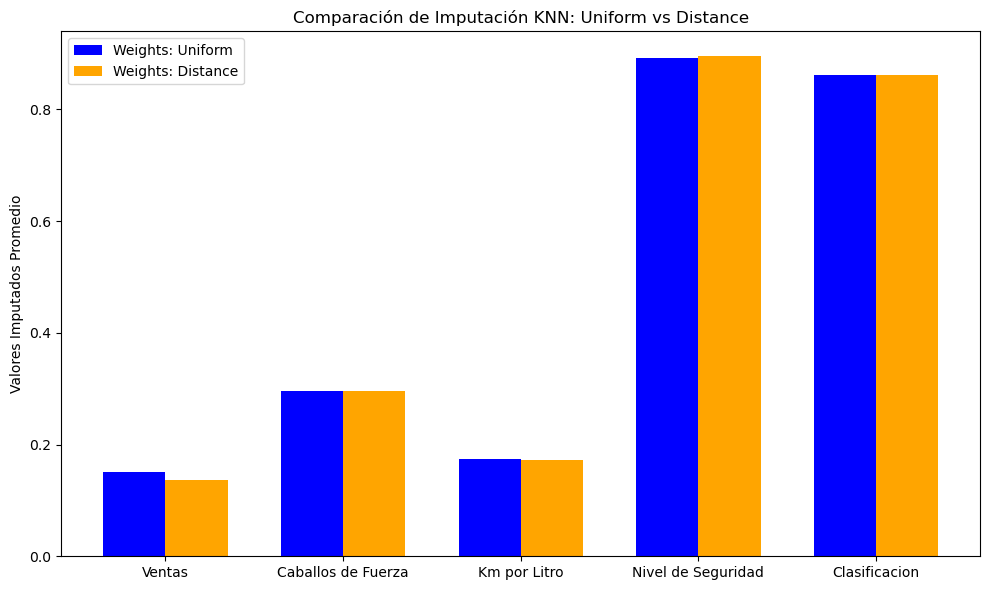

In [33]:
import matplotlib.pyplot as plt

# Graficar la comparación
labels = ['Ventas', 'Caballos de Fuerza', 'Km por Litro', 'Nivel de Seguridad', 'Clasificacion']
x = np.arange(len(labels))  # el rango de las etiquetas
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))
# Graficar los datos imputados
width = 0.35  # el ancho de las barras
ax.bar(x - width/2, imputerUniform.mean(axis=0), width, label='Weights: Uniform', color='blue')
ax.bar(x + width/2, imputerDistance.mean(axis=0), width, label='Weights: Distance', color='orange')
# Añadir etiquetas y título
ax.set_ylabel('Valores Imputados Promedio')
ax.set_title('Comparación de Imputación KNN: Uniform vs Distance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
# Mostrar el gráfico
plt.tight_layout()
plt.show()